In [1]:
import pandas as pd
from data_preprocessor import preprocess, preprocess_test

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [14]:
test['Is Fraud'].value_counts()

Is Fraud
0    1906298
1       2488
Name: count, dtype: int64

In [28]:
x_train = train.drop(['Is Fraud'],axis = 1)
y_train = train['Is Fraud']


x_test = test.drop(['Is Fraud'],axis = 1)
y_test = test['Is Fraud']

In [29]:
x_train, scaler, encoder = preprocess(x_train)

In [30]:
x_test = x_test.iloc[:, 1:]

In [31]:
x_test= preprocess_test(x_test,scaler, encoder)

In [ ]:
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 200000, number of negative: 4453834
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.183374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 4653834, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042975 -> initscore=-3.103203
[LightGBM] [Info] Start training from score -3.103203


LGBMClassifier()

In [33]:
prediction_lgb = model.predict(x_test)
print('Predicted labels: ', np.round(prediction_lgb)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [0 0 0 0 0 0 0 0 0 0]
Actual labels   :  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Is Fraud, dtype: int64


In [34]:
print('Accuracy: ', accuracy_score(y_test, prediction_lgb))

Accuracy:  0.9987002209781505


In [35]:
print(classification_report(y_test, prediction_lgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906298
           1       0.50      0.21      0.29      2488

    accuracy                           1.00   1908786
   macro avg       0.75      0.60      0.65   1908786
weighted avg       1.00      1.00      1.00   1908786



[[1905786     512]
 [   1969     519]]


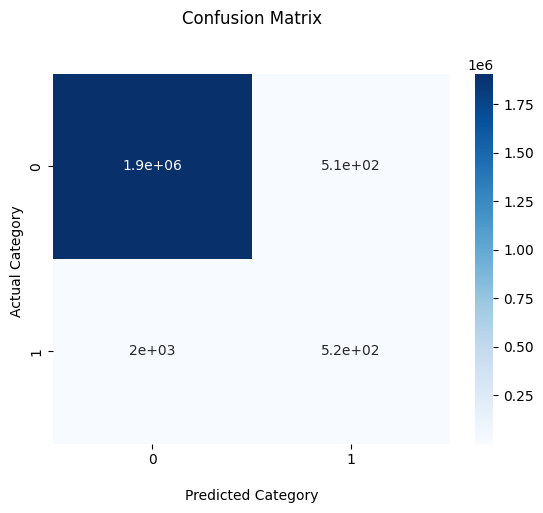

In [36]:
cm = confusion_matrix(y_test, prediction_lgb)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [37]:
predicted_labels = np.round(prediction_lgb)

# Check for incorrect predictions
incorrect_predictions = np.where(predicted_labels != y_test)[0]

# Display the rows in x_test where the model made incorrect predictions
incorrect_rows = x_test.iloc[incorrect_predictions]

print('Rows with incorrect predictions:')
print(incorrect_rows)

# for idx in incorrect_predictions:
#     print(f'Index: {idx}, Predicted: {predicted_labels[idx]}, Actual: {y_test[idx]}')

Rows with incorrect predictions:
         Type    Amount  ID Source  Old Balance  New Balance  Source State  \
192         4  0.002371    1592279     0.005002     0.000000             4   
396         1  0.044404    1004869     0.093680     0.000000             3   
2592        4  0.106129     969414     0.223901     0.000000             6   
4623        4  0.000540    1123745     0.001140     0.000000             2   
4932        4  0.005861     834474     0.012588     0.000224             2   
...       ...       ...        ...          ...          ...           ...   
1907045     1  0.005550    1440057     0.012828     0.001123             2   
1907819     4  0.002141     140770     0.004517     0.000000             6   
1908193     1  0.000704     841520     0.001485     0.000000             1   
1908408     4  0.002180      45474     0.004599     0.000000             5   
1908704     4  0.000231     871108     0.000488     0.000000             0   

         Source City  Device N

Undersampling the Fraud Cases to get equal ratio

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = test[test['Is Fraud'] == 0]
df_minority = test[test['Is Fraud'] == 1]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,              # without replacement
    n_samples=len(df_minority),# match minority class size
    random_state=42             # reproducibility
)

# Combine minority class with downsampled majority
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_test_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [49]:
df_test_balanced['Is Fraud'].value_counts()

Is Fraud
1    2488
0    2488
Name: count, dtype: int64

In [50]:
x_test = df_test_balanced.drop(['Is Fraud'],axis = 1)
y_test = df_test_balanced['Is Fraud']

In [51]:
x_test = x_test.iloc[:, 1:]

In [52]:
x_test= preprocess_test(x_test,scaler, encoder)

In [53]:
prediction_lgb = model.predict(x_test)
print('Predicted labels: ', np.round(prediction_lgb)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [0 0 0 0 0 0 1 0 1 0]
Actual labels   :  0    1
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    1
9    0
Name: Is Fraud, dtype: int64


In [41]:
print('Accuracy: ', accuracy_score(y_test, prediction_lgb))

Accuracy:  0.9987002209781505


In [42]:
print(classification_report(y_test, prediction_lgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906298
           1       0.50      0.21      0.29      2488

    accuracy                           1.00   1908786
   macro avg       0.75      0.60      0.65   1908786
weighted avg       1.00      1.00      1.00   1908786



[[2488    0]
 [1964  524]]


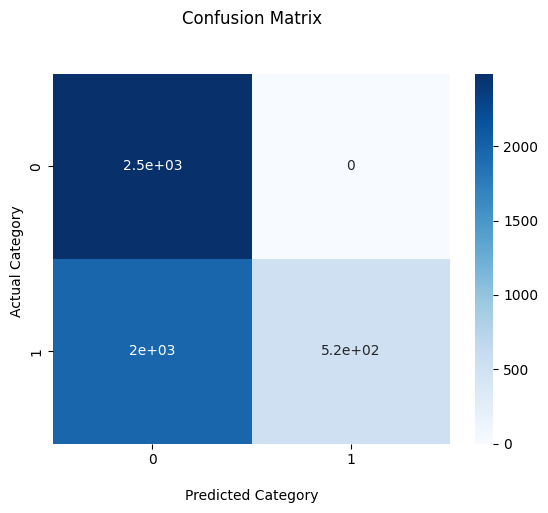

In [54]:
cm = confusion_matrix(y_test, prediction_lgb)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()